##Content


1. Introduction
2. Problem Definition
3. Data Collection 
4. Data Preprocessing
5. Data Clean-up
6. Exploratory Data Analysis 
7. Visualization
8. Feature Selection 
9. Model Experiment
10. Implementation of Selected Model

#Introduction:
Crime is one of the growing concerns in this modern era. Seattle has been facing continual crime related issues. With increasing crimes in the city, we are doing the predication analysis to find criminal hotspots in Seattle.

#Problem Definition:
Analyzing the real-world crime data of Seattle and finding the smooth livelihood in the city. For this analysis crime factors like robbery, murder, burglary and racial disparities are considered.

We will try to identify most probable crime location and their recurrent occurring time. Also, we will find what category of crime might happen next in the specified location at a specific time. Identifying areas by crime rates can be helpful in preventing the crime or reducing the loss to a property/life. This solution might help cops to identify the crime location and increase
the security levels in those crime hotspots. 

This process includes -
• Collecting the data
• Classifying
• Identifying the pattern
• Predicting the crime
• Visualization or presentation of the report.


#Data Sources:
We are using the data published by the Seattle Police Department and Washington Association of Sheriff Department. Below are the references for those sites.
https://data.seattle.gov/Public-Safety/SPD-Crime-Data-2008-Present/tazs-3rd5

#Data Description:
As of today, we have around 955 K records and 17 columns in the Seattle Police Department dataset. It consists of variables like Report Number, Offense ID, Offense Start Date Time, Offense End Date Time, Report Date Time, Crime Against Category, Group A B etc.

For this project, we will be using the data from Seattle Police Department which contains the crime report from 2008 to present. We will use this data to predict safe neighbourhood by considering the data of the years 2019,2020 and 2021.

## Import required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path
from sklearn import preprocessing
import geopandas as gpd
#!pip install basemap-data-hires
from mpl_toolkits.basemap import Basemap
#!pip install mplcursors
import mplcursors

## Loading data downloaded from source

In [2]:
#Loading the entire dataset
from google.colab import files
file = files.upload()  #uploading file into google colab session
TotalCrimeData = pd.read_csv("SPD_Crime_Data__2008-Present.csv") 
TotalCrimeData.head()

Saving SPD_Crime_Data__2008-Present.csv to SPD_Crime_Data__2008-Present.csv


,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193


## Determine the shape of the data frame. 

In [4]:
TotalCrimeData.shape

(962558, 17)

## It has 962558 rows and 17 columns

## Find the dataframe row and columns definition

In [5]:
TotalCrimeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962558 entries, 0 to 962557
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Report Number           962558 non-null  object 
 1   Offense ID              962558 non-null  int64  
 2   Offense Start DateTime  961599 non-null  object 
 3   Offense End DateTime    531255 non-null  object 
 4   Report DateTime         962558 non-null  object 
 5   Group A B               962558 non-null  object 
 6   Crime Against Category  962558 non-null  object 
 7   Offense Parent Group    962558 non-null  object 
 8   Offense                 962558 non-null  object 
 9   Offense Code            962558 non-null  object 
 10  Precinct                962554 non-null  object 
 11  Sector                  962556 non-null  object 
 12  Beat                    962556 non-null  object 
 13  MCPP                    962555 non-null  object 
 14  100 Block Address   

## Cleanup
Preprocessing and cleaning up data is an important aspect of data analysis.

We shall drop unnecessary columns and rename columns as required.

In [3]:
# Dropping Report Date Time and Offense Date Time

TotalCrimeData = TotalCrimeData.drop(columns = ['Offense End DateTime','Report DateTime'])

# These columns will not be used to predict upcoming crimes or safe neighbourhood.

In [4]:
# Dropping Group A B and Crime Against Category

TotalCrimeData = TotalCrimeData.drop(columns = ['Group A B','Crime Against Category'])

# These columns are redundant, we can fetch the same information from other columns - Offense Parent Group and Offense

In [5]:
# Dropping Offense ID and Beat

TotalCrimeData = TotalCrimeData.drop(columns = ['Offense ID','Beat'])

# Offense ID is just an identifier and we have another identifier column Report Number.
# Beat information is also available in Sector column

## Show the remaining column names.

In [9]:
TotalCrimeData.columns

Index(['Report Number', 'Offense Start DateTime', 'Offense Parent Group',
       'Offense', 'Offense Code', 'Precinct', 'Sector', 'MCPP',
       '100 Block Address', 'Longitude', 'Latitude'],
      dtype='object')

### Some column titles consist of two space separated words. For further analysis it's more convenient to have column names which are single words.

In [6]:
TotalCrimeData.columns = [s.strip().replace(' ', '_') for s in TotalCrimeData.columns]
TotalCrimeData.columns

Index(['Report_Number', 'Offense_Start_DateTime', 'Offense_Parent_Group',
       'Offense', 'Offense_Code', 'Precinct', 'Sector', 'MCPP',
       '100_Block_Address', 'Longitude', 'Latitude'],
      dtype='object')

## Accessing subsets of the data

We shall consider rows with report number starting with 2019,2020 and 2021 using pattern matching. We are considering only recent 3 years data for detailed analysis.

In [7]:
Year = ['2019','2020','2021']
FinalCrimeData = TotalCrimeData[TotalCrimeData.Report_Number.str.startswith(tuple(Year))]

### Print number of common statistics of final data

In [8]:
FinalCrimeData.describe(include = 'all')

,Report_Number,Offense_Start_DateTime,Offense_Parent_Group,Offense,Offense_Code,Precinct,Sector,MCPP,100_Block_Address,Longitude,Latitude
count,218718,217805,218718,218718,218718,218714,218716,218715,205463,218718.000000,218718.000000
unique,203782,135176,32,57,57,8,21,61,25406,NaN,NaN
top,2019-141012,03/08/2020 12:00:00 AM,LARCENY-THEFT,Theft From Motor Vehicle,23F,N,U,DOWNTOWN COMMERCIAL,14XX BLOCK OF 2ND AVE,NaN,NaN
freq,7,274,76681,29203,29203,74033,19335,14399,1124,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-114.910488,44.735602
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.203033,11.369098
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.432252,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.348355,47.578770
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.327721,47.615838
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.308387,47.663996


## Check for NA values in the data frame.

In [13]:
FinalCrimeData.isna().sum()

Report_Number                 0
Offense_Start_DateTime      913
Offense_Parent_Group          0
Offense                       0
Offense_Code                  0
Precinct                      4
Sector                        2
MCPP                          3
100_Block_Address         13255
Longitude                     0
Latitude                      0
dtype: int64

## Drop the rows with NA values. We cannot impute this as we are predicting the crime based on time and imputing may manipulate the information.

In [9]:
FinalCrimeData = FinalCrimeData.dropna(subset=['Offense_Start_DateTime'])
FinalCrimeData = FinalCrimeData.dropna(subset=['Precinct'])
FinalCrimeData = FinalCrimeData.dropna(subset=['MCPP'])
FinalCrimeData = FinalCrimeData.dropna(subset=['Sector'])
FinalCrimeData.shape

(217800, 11)

### We are ignoring the NA values in column 100 Block Address as this data can be fetched from longitude and latitude.

### We are not Scaling/Normalizing the data as Longitude and Latitudes are the only numeric columns and scaling them would manipulate the location data.

#Exploratory Data Analysis

##Shape of processed data

In [16]:
FinalCrimeData.shape

(217800, 11)

##Description for categorical and numerical data

In [10]:
FinalCrimeData.describe(include = 'all')

,Report_Number,Offense_Start_DateTime,Offense_Parent_Group,Offense,Offense_Code,Precinct,Sector,MCPP,100_Block_Address,Longitude,Latitude
count,217800,217800,217800,217800,217800,217800,217800,217800,204688,217800.000000,217800.000000
unique,202927,135173,32,57,57,8,21,61,25376,NaN,NaN
top,2019-141012,03/08/2020 12:00:00 AM,LARCENY-THEFT,Theft From Motor Vehicle,23F,N,U,DOWNTOWN COMMERCIAL,14XX BLOCK OF 2ND AVE,NaN,NaN
freq,7,274,76393,29169,29169,73739,19272,14371,1123,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-114.959527,44.754721
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.112604,11.333900
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.432252,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.348355,47.578872
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.327755,47.615838
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.308459,47.663996


##Checking if there are any na values. 

In [18]:
FinalCrimeData.isna().sum()

Report_Number                 0
Offense_Start_DateTime        0
Offense_Parent_Group          0
Offense                       0
Offense_Code                  0
Precinct                      0
Sector                        0
MCPP                          0
100_Block_Address         13112
Longitude                     0
Latitude                      0
dtype: int64

##Returns the number of unique entries over columns or rows


In [19]:
FinalCrimeData.nunique( )

Report_Number             202927
Offense_Start_DateTime    135173
Offense_Parent_Group          32
Offense                       57
Offense_Code                  57
Precinct                       8
Sector                        21
MCPP                          61
100_Block_Address          25376
Longitude                  31012
Latitude                   25594
dtype: int64

##Checking for duplicate rows

In [15]:
dup = FinalCrimeData.duplicated()
print(dup.sum())

211


##Dropping duplicate rows

In [11]:
FinalCrimeData.drop_duplicates(keep = 'first', inplace = True)

FinalCrimeData.shape

(217589, 11)

##Data types of each column

In [22]:
FinalCrimeData.dtypes

Report_Number              object
Offense_Start_DateTime     object
Offense_Parent_Group       object
Offense                    object
Offense_Code               object
Precinct                   object
Sector                     object
MCPP                       object
100_Block_Address          object
Longitude                 float64
Latitude                  float64
dtype: object

##Finidng mean and median for numeric columns

In [23]:
FinalCrimeData.mean(numeric_only = True)

Longitude   -114.954065
Latitude      44.752599
dtype: float64

In [24]:
FinalCrimeData.median(numeric_only = True)

Longitude   -122.327755
Latitude      47.615848
dtype: float64

##Dimension of the data

In [25]:
FinalCrimeData.ndim

2

## Adding Area_Count and Crime_Count to calculate Safe neighborhood as Response variable. 
## This will be used to predict whether the area is a safe neighborhood or not.
## Considering Threshold of 5000 for calculating Safe neighborhood. If the area count value is less than 5000 it is a safe neighborhood.

In [12]:
FinalCrimeData['Area_Count'] = FinalCrimeData.groupby('MCPP')['MCPP'].transform('count')
FinalCrimeData['Crime_Count'] = FinalCrimeData.groupby(['MCPP','Offense'])['MCPP'].transform('count')
FinalCrimeData['Safe_Neighborhood'] = [1 if x <= 5000 else 0 for x in FinalCrimeData['Area_Count']]
FinalCrimeData.head(100)

,Report_Number,Offense_Start_DateTime,Offense_Parent_Group,Offense,Offense_Code,Precinct,Sector,MCPP,100_Block_Address,Longitude,Latitude,Area_Count,Crime_Count,Safe_Neighborhood
0,2020-044620,02/05/2020 10:10:00 AM,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387,4007,16,1
1,2020-044452,02/03/2020 08:00:00 AM,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118,8799,562,0
2,2020-044465,02/02/2020 08:30:00 PM,ROBBERY,Robbery,120,N,U,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384,8799,132,0
3,2020-044225,02/05/2020 01:17:00 AM,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927,4007,313,1
4,2020-044076,02/05/2020 12:51:21 AM,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193,8577,75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-041873,01/31/2020 05:00:00 PM,LARCENY-THEFT,Theft From Motor Vehicle,23F,E,G,JUDKINS PARK/NORTH BEACON HILL,16XX BLOCK OF S JACKSON ST,-122.310925,47.599228,2282,354,1
96,2020-901670,02/02/2020 04:45:00 PM,LARCENY-THEFT,Theft From Building,23D,W,M,DOWNTOWN COMMERCIAL,15XX BLOCK OF PIKE PL,-122.340631,47.608724,14345,497,0
97,2020-901669,11/15/2019 08:00:00 PM,LARCENY-THEFT,Theft From Building,23D,W,K,PIONEER SQUARE,8XX BLOCK OF OCCIDENTAL AVE S,-122.333268,47.596783,3278,133,1
98,2020-901667,02/03/2020 08:30:00 AM,LARCENY-THEFT,Theft From Motor Vehicle,23F,E,E,FIRST HILL,11XX BLOCK OF E MADISON ST,-122.317914,47.612361,7502,734,0


In [27]:
FinalCrimeData.shape

(217589, 14)

In [13]:
FinalCrimeData.sort_values(by='Area_Count', ascending=False)

,Report_Number,Offense_Start_DateTime,Offense_Parent_Group,Offense,Offense_Code,Precinct,Sector,MCPP,100_Block_Address,Longitude,Latitude,Area_Count,Crime_Count,Safe_Neighborhood
826638,2020-227024,07/30/2020 01:43:00 PM,LARCENY-THEFT,Shoplifting,23C,W,M,DOWNTOWN COMMERCIAL,6XX BLOCK OF PINE ST,-122.334818,47.612368,14345,1907,0
909992,2019-900276,12/30/2018 07:50:00 PM,LARCENY-THEFT,All Other Larceny,23H,W,M,DOWNTOWN COMMERCIAL,6XX BLOCK OF PINE ST,-122.334818,47.612368,14345,830,0
38168,2019-043020,02/02/2019 05:22:00 AM,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,K,DOWNTOWN COMMERCIAL,CHERRY ST / 2ND AVE,-122.333172,47.603019,14345,1156,0
832789,2020-258645,09/04/2020 02:10:00 PM,ASSAULT OFFENSES,Simple Assault,13B,W,M,DOWNTOWN COMMERCIAL,4XX BLOCK OF PINE ST,-122.337320,47.611321,14345,1499,0
910046,2019-900178,10/01/2018 12:00:00 AM,FRAUD OFFENSES,Impersonation,26C,W,M,DOWNTOWN COMMERCIAL,1XX BLOCK OF UNIVERSITY ST,-122.340136,47.606024,14345,46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39250,2019-031145,01/24/2019 03:00:00 AM,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,SW,W,COMMERCIAL HARBOR ISLAND,27XX BLOCK OF 16TH AVE SW,-122.355662,47.576191,96,12,1
833026,2020-257574,09/03/2020 05:30:00 AM,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,SW,W,COMMERCIAL HARBOR ISLAND,18XX BLOCK OF 16TH AVE SW,-122.354942,47.585356,96,12,1
792222,2019-459785,12/12/2019 04:29:00 PM,ROBBERY,Robbery,120,SW,W,COMMERCIAL HARBOR ISLAND,NaN,0.000000,0.000000,96,2,1
919268,2021-154783,06/21/2021 06:30:00 PM,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,M,SlU/CASCADE,3RD AVE / VIRGINIA ST,-122.340892,47.612398,1,1,1


##Box plot for area wise crimes

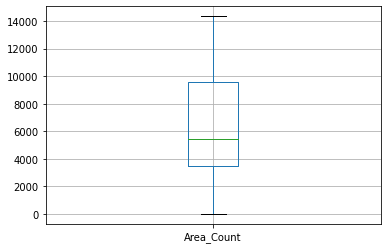

In [ ]:
FinalCrimeData.boxplot(column='Area_Count')
plt.show()

##Box plot for crime counts for each offense type in different areas

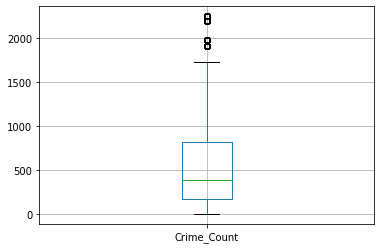

In [ ]:
FinalCrimeData.boxplot(column='Crime_Count')
plt.show()

##Bar plot for top 10 crime areas

Text(0.5, 1.0, 'Top 10 Crime Areas')

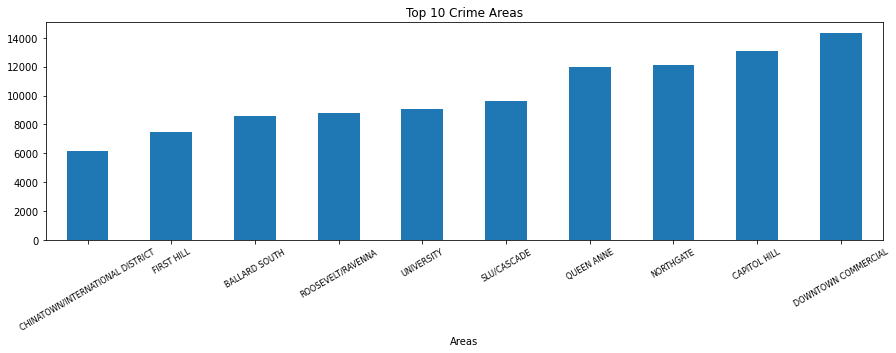

In [29]:
from numpy.ma.core import count
x = FinalCrimeData.groupby('MCPP')['MCPP'].count().sort_values().tail(10)
ax= x.plot(kind='bar',figsize = (15,4) )
plt.xticks(rotation=30, horizontalalignment="center",size = 8)
plt.xlabel("Areas")
ax.set_title("Top 10 Crime Areas")


##Bar plot for top 10 offense type in Downtown Commercial(top crime area)

Text(0.5, 1.0, 'Top 10 Offense in Downtown Commercial')

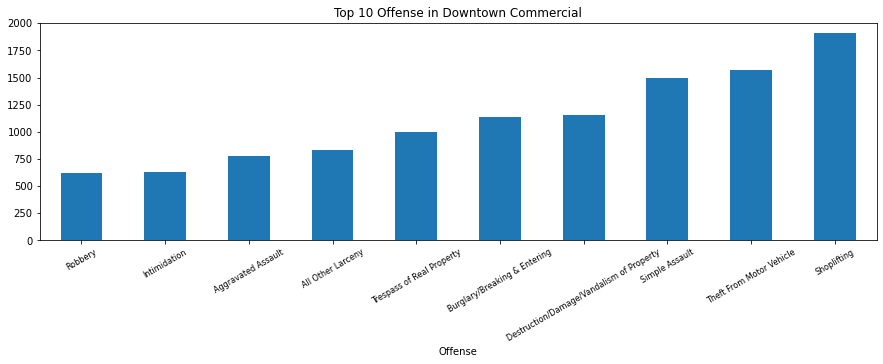

In [31]:
x = FinalCrimeData.groupby(['MCPP','Offense'])['MCPP'].count()['DOWNTOWN COMMERCIAL'].sort_values().tail(10)
#x.plot(kind='bar')
ax= x.plot(kind='bar',figsize = (15,4))
plt.xticks(rotation=30, horizontalalignment="center", size =8)
ax.set_title("Top 10 Offense in Downtown Commercial")

In [26]:
file = files.upload()  #uploading file into google colab session
SeattleShapesData =gpd.read_file("City_Clerk_Neighborhoods.geojson") 
SeattleShapesData.head()

Saving City_Clerk_Neighborhoods.geojson to City_Clerk_Neighborhoods.geojson


,OBJECTID,PERIMETER,S_HOOD,L_HOOD,L_HOODID,SYMBOL,SYMBOL2,AREA,HOODS_,HOODS_ID,SHAPE_Length,SHAPE_Area,geometry
0,1,617.843,OOO,,0,0,0,3588.443,2,0,617.842614,3588.442385,"POLYGON ((-122.27398 47.69523, -122.27407 47.6..."
1,2,733.568,OOO,,0,0,0,22294.777,3,0,733.568416,22294.781706,"POLYGON ((-122.28756 47.64523, -122.28754 47.6..."
2,3,4088.442,OOO,,0,0,0,56695.367,5,0,4088.441739,56695.357490,"POLYGON ((-122.39529 47.66514, -122.39540 47.6..."
3,4,1809.446,OOO,,0,0,0,64156.813,6,0,1809.445748,64156.821780,"POLYGON ((-122.39832 47.66609, -122.39830 47.6..."
4,5,250.330,OOO,,0,0,0,2993.164,7,0,250.330362,2993.161328,"POLYGON ((-122.28851 47.65630, -122.28847 47.6..."


In [63]:
geo_df = gpd.GeoDataFrame(FinalCrimeData, geometry=gpd.points_from_xy(FinalCrimeData.Longitude, FinalCrimeData.Latitude))
# because of warning, not necessary
geo_df.crs = SeattleShapesData.crs

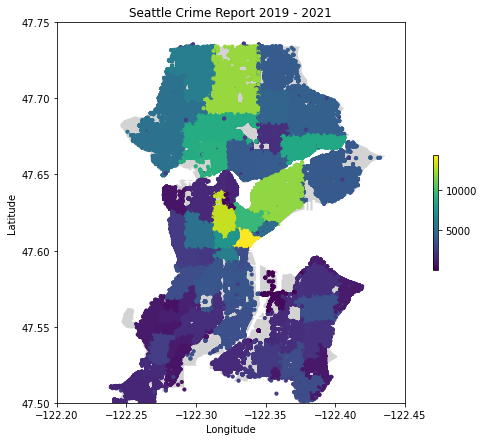

In [64]:
fig, ax = plt.subplots(figsize = (10,7))
SeattleShapesData.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(column = 'Area_Count', ax=ax,
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_xlim([-122.2, -122.45])
ax.set_ylim([47.5, 47.75])
cursor = mplcursors.cursor(ax,hover=True)
ax.set_title('Seattle Crime Report 2019 - 2021')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

# Exporting the final data set consisting of crimes for 3 years from 2019 to 2021.

In [ ]:
FinalCrimeData.to_csv('CrimeData_2019_2022_2021.csv')

In [ ]:
files.download('CrimeData_2019_2022_2021.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Feature Selection

## Benifits of Feature Selection
### Reduces Overfitting
### Improves Accuracy
### Reduces Training Time

## Methods 
### 1. Filter Method
### 2. Wrapper Method
### 3. Embedded Method

# Filter Method - Chi-squared Feature Selection



In [107]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import matplotlib.pylab as plt

# split into input (X) and output (y) variables
FinalCrimeData = FinalCrimeData[FinalCrimeData['Precinct'] != 'OOJ']


## We will split data based on years instead of using split function from scikit-learn. Using 2019 and 2020 data for training and 2021 for testing.

In [144]:
# split into train and test sets
Year = ['2019','2020']
ReducedCrimeData = FinalCrimeData[FinalCrimeData.Report_Number.str.startswith(tuple(Year))]

X_train = ReducedCrimeData.iloc[:, 2:-1]
y_train = ReducedCrimeData.iloc[:,-1]
# format all fields as string
X_train = X_train.astype(str)
y_train = y_train.astype(bool)

X_train.shape


Year = ['2021']

ReducedCrimeData_2021 = FinalCrimeData[FinalCrimeData.Report_Number.str.startswith(tuple(Year))]

X_test = ReducedCrimeData_2021.iloc[:, 2:-1]
y_test = ReducedCrimeData_2021.iloc[:,-1]
# format all fields as string
X_test = X_test.astype(str)
y_test = y_test.astype(bool)

X_test.shape


(70968, 11)

##Ordinal encoder is used to encode all categorical variables to numerical values.

In [145]:
enc = OrdinalEncoder()
X_train[["Offense_Parent_Group", "Precinct", "Offense_Code", "Sector", "Offense", "MCPP","100_Block_Address", "Longitude", "Latitude"]] = enc.fit_transform(X_train[["Offense_Parent_Group","Precinct", "Offense_Code", "Sector", "Offense","MCPP", "100_Block_Address", "Longitude", "Latitude"]])

X_test[["Offense_Parent_Group", "Precinct", "Offense_Code", "Sector", "Offense", "MCPP","100_Block_Address", "Longitude", "Latitude"]] = enc.fit_transform(X_test[["Offense_Parent_Group","Precinct", "Offense_Code", "Sector", "Offense","MCPP", "100_Block_Address", "Longitude", "Latitude"]])


##It is a binary classification problem, so we need to map the two class labels to 0 and 1. LabelEncoder is a type of ordinal encoding, specifically designed to map boolean values.

In [146]:
le = LabelEncoder()
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_train['Safe_Neighborhood'] = le.fit_transform(y_train["Safe_Neighborhood"])
y_test['Safe_Neighborhood'] = le.fit_transform(y_test["Safe_Neighborhood"])

## Chi-squared function from scikit learn is used in a feature selection strategy, by selecting the top k most relevant features (largest values) using the SelectKBest class.


In [111]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

## Printing the feature score for each variables and plotting the feature scores for each variables using bar graph. Larger the value of Feature score, the higher is the importance of the feature.

Feature 0: 31.035592
Feature 1: 1082.681769
Feature 2: 0.394786
Feature 3: 931.266098
Feature 4: 12946.850156
Feature 5: 3466.115961
Feature 6: 7025712.385021
Feature 7: 4422008.514150
Feature 8: 56227618.294405
Feature 9: 254997116.480692
Feature 10: 19140110.958953


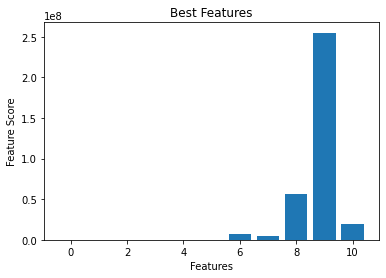

In [118]:
# scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
 
# plotting the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xlabel("Features")
plt.ylabel("Feature Score")
plt.title("Best Features")
plt.show()

## From the above graph and scores, we can see that Feature 8 & 9 is the most relevant which is Longitude and Latitude.
## 5 features out of 10 features considered are most relevant.

# Modeling with Selected Features

### Here we will evaluate the logistic regression models without Feature Selection

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 97.04


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Here we will evaluate the logistic regression models with all Features built from feature selected models using Chi-squared.

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k=4)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs

# feature selection
X_train_fs, X_test_fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 100.00


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### From the above results, we can see that the model achieves a classification accuracy of about 97 % whereas the model with feature selection using chi-squared achieves an accuracy of 100 %. So there is an increase in the model performance with selected features.

##Applying other models for binary classification-
###1) Decision Tree
###2) Naive Bayes
###3) KNN
###4) Support Vector Machine

##Before applying the models lets build a function to store all the evaluation metrics and use it for each model.

In [121]:
def evaluate_model(model, X_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(X_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

#Decision Tree

In [122]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train_fs, y_train)

DecisionTreeClassifier(random_state=0)

In [123]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test_fs, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
#print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Area Under Curve: 1.0
Confusion Matrix:
 [[40290     0]
 [    0 30678]]


#Naive Bayes

In [124]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train_fs, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [125]:
# Evaluate Model
nb_eval = evaluate_model(nb, X_test_fs, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
#print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.9322229737346409
Precision: 0.8961408882082695
Recall: 0.9537453549775083
F1 Score: 0.9240462354724608
Area Under Curve: 0.9910668110595471
Confusion Matrix:
 [[36899  3391]
 [ 1419 29259]]


#K Nearest Neighbours

In [126]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train_fs, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [127]:
# Evaluate Model
knn_eval = evaluate_model(knn, X_test_fs, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
#print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.9464406493067298
Precision: 0.8993492021039493
Recall: 0.9865049872873068
F1 Score: 0.9409131185002098
Area Under Curve: 0.9733948986058132
Confusion Matrix:
 [[36903  3387]
 [  414 30264]]


#Support Vecotor Machine

In [128]:
import sklearn as sk
from sklearn.svm import SVC
import pandas as pd
import os

In [129]:
SVM = SVC()

SVM.probability = True
SVM.fit(X_train_fs, y_train)



# Evaluate Model
svm_eval = evaluate_model(SVM, X_test_fs, y_test)

# Print result
print('Accuracy:', svm_eval['acc'])
print('Precision:', svm_eval['prec'])
print('Recall:', svm_eval['rec'])
print('F1 Score:', svm_eval['f1'])
#print('Cohens Kappa Score:', svm_eval['kappa'])
print('Area Under Curve:', svm_eval['auc'])
print('Confusion Matrix:\n', svm_eval['cm'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Area Under Curve: 1.0
Confusion Matrix:
 [[40290     0]
 [    0 30678]]


##Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_fs, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(random_state=0)

In [131]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test_fs, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Cohens Kappa Score: 1.0
Area Under Curve: 0.9999999999999999
Confusion Matrix:
 [[40290     0]
 [    0 30678]]


##Model Comparison and Performance Evaluation

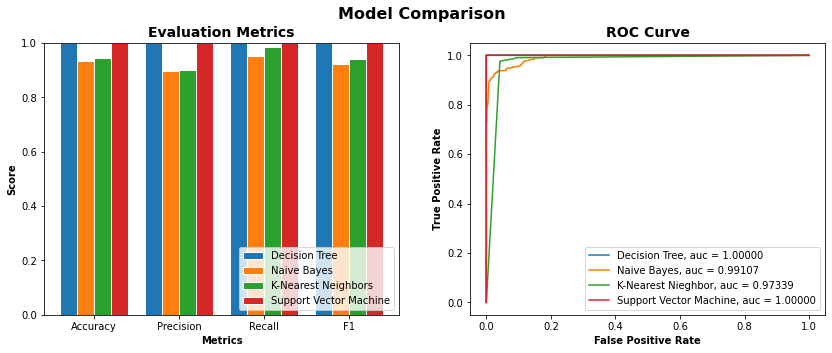

In [135]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(5)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1']]
#rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1']]
svm_score = [svm_eval['acc'], svm_eval['prec'], svm_eval['rec'], svm_eval['f1']]


## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
#r5 = [x + barWidth for x in r4]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
#ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r2, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r3, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r4, svm_score, width=barWidth, edgecolor='white', label='Support Vector Machine')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend(loc=4)

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
#ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(svm_eval['fpr'], svm_eval['tpr'], label='Support Vector Machine, auc = {:0.5f}'.format(svm_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

# Implementation of Selected Models

### After model experiments, Decision Tree gives the best performance on the data set. For implementation we will apply cross validation techniques on the given data set. Since it is a binary classification problem, for cross validation techniques K-fold and stratified k-fold is considered.

## Applying Cross - Validation Techniques

## 1. K-fold Cross validation with 5 folds

In [149]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

X = FinalCrimeData.iloc[:, 2:-1]
y = FinalCrimeData.iloc[:,-1]
# format all fields as string
X = X.astype(str)
y = y.astype(bool)

enc = OrdinalEncoder()
X[["Offense_Parent_Group", "Precinct", "Offense_Code", "Sector", "Offense", "MCPP","100_Block_Address", "Longitude", "Latitude"]] = enc.fit_transform(X[["Offense_Parent_Group","Precinct", "Offense_Code", "Sector", "Offense","MCPP", "100_Block_Address", "Longitude", "Latitude"]])

le = LabelEncoder()
y = pd.DataFrame(y)
y['Safe_Neighborhood'] = le.fit_transform(y["Safe_Neighborhood"])


cnt = 1
kf = KFold(n_splits=5)
crossvalidation_result = []
for train_index, test_index in kf.split(X):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # fit the model
    model = tree.DecisionTreeClassifier(random_state=0)
    model.fit(X_train, y_train)
    #Evaluation of Model
    yhat = model.predict(X_test)
    cross_validation = mean_absolute_error(y_test,yhat).round(4)
    crossvalidation_result.append(cross_validation)


cross_validation_score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5)
print("Cross-Validation score:", cross_validation_score)
print('Overall Accuracy: %.2f' % (mean(cross_validation_score)*100))
print("Mean absolute error of each fold:", crossvalidation_result)
print("Avg of Mean absolute error:", mean(crossvalidation_result))

Fold:1, Train set: 174070, Test set:43518
Fold:2, Train set: 174070, Test set:43518
Fold:3, Train set: 174070, Test set:43518
Fold:4, Train set: 174071, Test set:43517
Fold:5, Train set: 174071, Test set:43517
Cross-Validation score: [1. 1. 1. 1. 1.]
Overall Accuracy: 100.00
Mean absolute error of each fold: [0.0, 0.0, 0.0, 0.0, 0.0]
Avg of Mean absolute error: 0.0


## 2. K-fold Cross validation with 10 folds

In [139]:
import numpy as np
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

cnt = 1
kf = KFold(n_splits=10)
crossvalidation_result = []
for train_index, test_index in kf.split(X):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # fit the model
    model = tree.DecisionTreeClassifier(random_state=0)
    model.fit(X_train, y_train)
    #Evaluation of Model
    yhat = model.predict(X_test)
    cross_validation = mean_absolute_error(y_test,yhat).round(4)
    crossvalidation_result.append(cross_validation)
    

cross_validation_score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10)
print("Cross-Validation score:", cross_validation_score)
print('Overall Accuracy: %.2f' % (mean(cross_validation_score)*100))
print("Mean absolute error of each fold:", crossvalidation_result)
print("Avg of Mean absolute error:", mean(crossvalidation_result))

Fold:1, Train set: 195829, Test set:21759
Fold:2, Train set: 195829, Test set:21759
Fold:3, Train set: 195829, Test set:21759
Fold:4, Train set: 195829, Test set:21759
Fold:5, Train set: 195829, Test set:21759
Fold:6, Train set: 195829, Test set:21759
Fold:7, Train set: 195829, Test set:21759
Fold:8, Train set: 195829, Test set:21759
Fold:9, Train set: 195830, Test set:21758
Fold:10, Train set: 195830, Test set:21758
Cross-Validation score: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Overall Accuracy: 100.00
Mean absolute error of each fold: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Avg of Mean absolute error: 0.0


## 3. Stratified K-fold Cross validation with 5 folds

In [140]:
import numpy as np
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import StratifiedKFold

cnt = 1
skf = StratifiedKFold(n_splits=5)
stratified_crossvalidation_result = []
for train_index, test_index in skf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # fit the model
    model = tree.DecisionTreeClassifier(random_state=0)
    model.fit(X_train, y_train)
    #Evaluation of Model
    yhat = model.predict(X_test)
    stratified_cross_validation = mean_absolute_error(y_test,yhat).round(4)
    stratified_crossvalidation_result.append(stratified_cross_validation)

stratified_cross_validation_score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5)
print("Stratified Cross-Validation score:", stratified_cross_validation_score)
print('Overall Accuracy: %.2f' % (mean(stratified_cross_validation_score)*100))
print("Mean absolute error of each fold:", stratified_crossvalidation_result)
print("Avg of Mean absolute error for Stratified Cross-Validation:", mean(stratified_crossvalidation_result))

Fold:1, Train set: 174070, Test set:43518
Fold:2, Train set: 174070, Test set:43518
Fold:3, Train set: 174070, Test set:43518
Fold:4, Train set: 174071, Test set:43517
Fold:5, Train set: 174071, Test set:43517
Stratified Cross-Validation score: [1. 1. 1. 1. 1.]
Overall Accuracy: 100.00
Mean absolute error of each fold: [0.0, 0.0, 0.0, 0.0, 0.0]
Avg of Mean absolute error for Stratified Cross-Validation: 0.0


## 4. Stratified K-fold Cross validation with 10 folds

In [142]:
import numpy as np
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import StratifiedKFold

cnt = 1
skf = StratifiedKFold(n_splits=10)
stratified_crossvalidation_result = []
for train_index, test_index in skf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # fit the model
    model = tree.DecisionTreeClassifier(random_state=0)
    model.fit(X_train, y_train)
    #Evaluation of Model
    yhat = model.predict(X_test)
    stratified_cross_validation = mean_absolute_error(y_test,yhat).round(4)
    stratified_crossvalidation_result.append(stratified_cross_validation)
    

stratified_cross_validation_score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10)
print("Stratified Cross-Validation score:", stratified_cross_validation_score)
print('Overall Accuracy: %.2f' % (mean(stratified_cross_validation_score)*100))
print("Mean absolute error of each fold:", stratified_crossvalidation_result)
print("Avg of Mean absolute error for Stratified Cross-Validation:", mean(stratified_crossvalidation_result))

Fold:1, Train set: 195829, Test set:21759
Fold:2, Train set: 195829, Test set:21759
Fold:3, Train set: 195829, Test set:21759
Fold:4, Train set: 195829, Test set:21759
Fold:5, Train set: 195829, Test set:21759
Fold:6, Train set: 195829, Test set:21759
Fold:7, Train set: 195829, Test set:21759
Fold:8, Train set: 195829, Test set:21759
Fold:9, Train set: 195830, Test set:21758
Fold:10, Train set: 195830, Test set:21758
Stratified Cross-Validation score: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Overall Accuracy: 100.00
Mean absolute error of each fold: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Avg of Mean absolute error for Stratified Cross-Validation: 0.0


###We can see here that model is performing equally for all the K fold splits 
### This may suggest that the Decision tree model for our problem is very  optimistic. By the stratified validation results, we can come to conclusion that the dataset is balanced.
### Also for all the four models our accuracy is same in all 5/10 folds. This means that our algorithm (and our data) is consistent and deploying it  will lead to similar performance.
